In [1]:
import numpy as np
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt

In [5]:
dataset_path = 'CNN letter Dataset'
IMG_SIZE = 20  # 20x20 pixels

def load_dataset(dataset_path):
    train_data = []
    train_labels = []

    #iterate over each digit/letter folder (e.g., 0, A, B, etc.)
    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)

        #ensure the folder name is a valid digit/letter
        if label.isalnum():  # Checks if the folder name is alphanumeric (A-Z, 0-9)
            #iterate over each image file in the digit/letter folder
            for img_name in os.listdir(label_path):
                img_path = os.path.join(label_path, img_name)

                #load the image in grayscale
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                #resize to a fixed size (20x20)
                img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

                #flatten the image into a single feature vector
                img_flattened = img_resized.flatten()

                #append the image data and label
                train_data.append(img_flattened)
                train_labels.append(label)  # Use folder name as the label
    
    #convert lists to NumPy arrays
    train_data = np.array(train_data, dtype=np.float32)
    train_labels = np.array(train_labels)
    
    return train_data, train_labels

#load the dataset
train_data, train_labels = load_dataset(dataset_path)

#encode labels as integers (since KNN needs numerical labels)
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)

#print some information about the dataset
print(f'Training data shape: {train_data.shape}')
print(f'Number of samples: {len(train_labels)}')
print(f'Classes: {label_encoder.classes_}')

Training data shape: (35500, 400)
Number of samples: 35500
Classes: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


In [9]:
#SAVING DATA
#assuming train_data and train_labels_encoded are already defined
data_filename = 'train_data.pkl'
labels_filename = 'train_labels.pkl'

#save the training data and labels
joblib.dump(train_data, data_filename)
print(f'Training data saved to {data_filename}')

joblib.dump(train_labels_encoded, labels_filename)
print(f'Training labels saved to {labels_filename}')

Training data saved to train_data.pkl
Training labels saved to train_labels.pkl


In [ ]:
X = train_data  #features
y = train_labels_encoded  #labels

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}')

from sklearn.neighbors import KNeighborsClassifier

#create a KNN model
knn = KNeighborsClassifier(n_neighbors=3)

#fit the model on the training data
knn.fit(X_train, y_train)

#save the trained KNN model
model_filename = 'knn_model.pkl'
joblib.dump(knn, model_filename)
print(f'Model saved to {model_filename}')

#make predictions on the test set
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

#print classification report for detailed metrics
print(classification_report(y_test, y_pred))

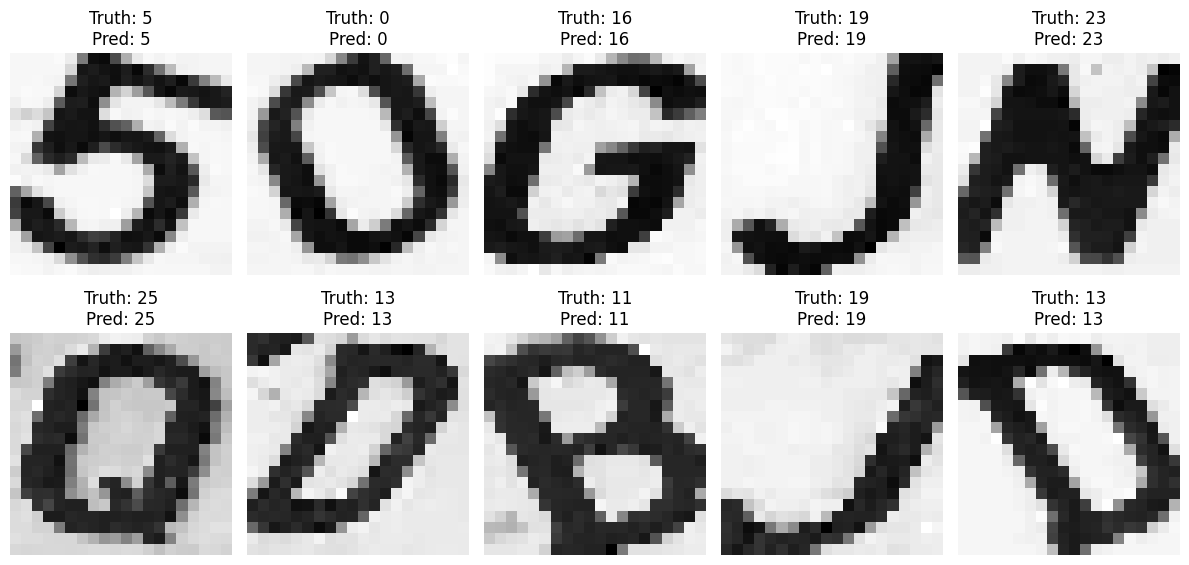

In [17]:
#convert predictions and ground truth back to letters
ground_truth_letters = label_encoder.inverse_transform(y_test)
predicted_letters = label_encoder.inverse_transform(y_pred)

#define the number of images to display
num_images_to_display = 10

#select a subset of images and their corresponding labels and predictions
indices = np.random.choice(range(len(y_test)), size=num_images_to_display, replace=False)
ground_truth = ground_truth_letters[indices]
predictions = predicted_letters[indices]
test_images = X_test[indices].reshape(-1, 20, 20)  # Reshape if necessary to original image dimensions

#set up the plot
plt.figure(figsize=(12, 6))

for i in range(num_images_to_display):
    plt.subplot(2, num_images_to_display // 2, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f'Truth: {ground_truth[i]}\nPred: {predictions[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()